In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/v_12.xlsx",sheet_name="ren_orig")
data.head()

,OpportunityID_ren,CreatedDate,FundedDate,OpportunityName,Priordeal_OppID,Renewal_PreviousCollectionStatus,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,...,Industry,Industry_Group__c,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,TwoMonthAvg_AdjustedMonthlyDeposits,AdjustedMonthlyDeposits,drop_percent,Drop_category
0,0062M00000o8ivqQAA,2022-01-10 17:42:32,2022-01-11,Trinity African Bar & Grill-Renewal Deal-01102022,0062M00000nZ5ksQAC,Other,100.00,0.74,689.0,6.0,...,Services,90 - Restaurants & Bars,0.0,0.0,0.123046,0.174799,35799.237777,32815.22,-8.335428,Negative
1,0062M00000hmHKAQA2,2019-09-23 13:50:27,2019-09-30,Demaa Property Solutions-Renewal Deal-09232019,0062M00000gAssFQAS,Other,100.00,0.90,547.0,1.0,...,"Finance, Insurance, Real Estate",65 - Real Estate,0.0,0.0,0.054024,0.139416,19263.500000,31250.00,62.223894,Positive
2,0062M00000kxeWLQAY,2020-07-20 17:12:35,2020-07-27,Itz Eazy Hauling-Renewal Deal-07202020,0062M00000jKLV5QAO,Default,82.87,0.88,559.0,1.0,...,Transportation & Public Utilities,42 - Motor Freight Transportation and Warehousing,0.0,0.0,0.413426,0.072838,44199.206153,34087.00,-22.878714,Negative
3,0062M00000mTGVnQAO,2021-08-05 13:37:09,2021-08-10,Altitude Solutions Professional Services-New D...,0062M00000mhN0JQAU,Default,20.00,0.05,616.0,1.0,...,Services,"87 - Engineering, Accounting, Research, Manage...",0.0,NaN,-1.095377,2.337393,40417.822000,5474.06,-86.456316,Negative
4,0062M00000gb1LRQAY,2019-08-20 18:17:46,2019-08-21,Carr & Smith Dental-Renewal Deal-08202019,0062M00000g8ynEQAQ,Other,100.00,0.89,594.0,2.0,...,Services,80 - Health Services,2.0,2.0,0.103061,0.066637,98051.325000,131351.00,33.961478,Positive


In [ ]:
data.shape

(3968, 55)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3968 entries, 0 to 3967
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   OpportunityID_ren                          3968 non-null   object        
 1   CreatedDate                                3968 non-null   datetime64[ns]
 2   FundedDate                                 3968 non-null   datetime64[ns]
 3   OpportunityName                            3968 non-null   object        
 4   Priordeal_OppID                            3968 non-null   object        
 5   Renewal_PreviousCollectionStatus           3968 non-null   object        
 6   Renewal_PreviousPace                       3953 non-null   float64       
 7   Renewal_PreviousPaidPercentageOfRTR        3953 non-null   float64       
 8   Renewal_PreviousCreditScore                3915 non-null   float64       
 9   Renewal_CountPrevio

# Check Anomalies

1. Perform EDA
2. check wos - remove missing but give in excel sheet:
3. Specifically take care of no of bank statements and all other attributes related to it:
4. Check again the pace rates - {check for extreme weird values} - min_val_check
5. Check for anomalies - time in business -ve_values
6. is this business home based - flag based  -
7. take care of features to be dropped - take previous references
8. fill the missing values - so as to keep the progress alive: 
9. EDA is completed - save the file

In [ ]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 47 

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Last3Months_MA_OverdraftDays',
       'Last3Months_MA_NumReturnItems', 'Last3Months_Sum_NumReturnItems',
       'LastBankStatement_OverdraftDays',
       'Last3Months_MA_AdjustedMonthlyDeposits',
       'Last3Months_MA_AvgDailyBalance', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'HBwoLCF', 'Contract_HoldBack__c',
       'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_Ove

In [ ]:
data.isna().sum().sort_values(ascending = False)/len(data)*100

NetWO                                        73.009073
HBwoLCF                                      61.491935
Renewal_PreviousHBwoLCF                      43.775202
LatestMonth_ReturnItemDays                   26.562500
LastBankStatement_OverdraftDays              19.254032
PctChangeInReveune                            4.284274
Renewal_PreviousAvgDailyBalance               3.629032
Renewal_PreviousAvgMonthRevenue               3.629032
Renewal_PreviousCreditScore                   1.335685
Credit_Score__c                               0.781250
Last3Statments_MA_ReturnItemDays              0.478831
Last3Statments_MA_AdjustedMonthlyDeposits     0.478831
Last3Months_MA_AvgDailyBalance                0.478831
Last3Months_MA_AdjustedMonthlyDeposits        0.478831
Last3Months_Sum_NumReturnItems                0.478831
Last3Months_MA_NumReturnItems                 0.478831
Last3Statments_MA_AvgDailyBalance             0.478831
PctAvgDailybalance2AvgMonthlyDeposits         0.478831
Avg_Return

In [ ]:
data.ActiveDeal_YN.value_counts()

0.0    3968
Name: ActiveDeal_YN, dtype: int64

In [ ]:
round(data.corr()["WriteOff_YN"].sort_values(),3)

NumberOfBankStatements                      -0.348
Time_in_Business__c                         -0.111
Renewal_PreviousPaidPercentageOfRTR         -0.095
Renewal_CountPreviousDeals                  -0.089
Credit_Score__c                             -0.059
Renewal_PreviousCreditScore                 -0.054
Contract_HoldBack__c                        -0.043
PctAvgDailybalance2AvgMonthlyDeposits       -0.040
NewDeal_YN                                  -0.032
Last3Months_Sum_NumReturnItems              -0.031
HB_with_LCF_Payment__c                      -0.020
Renewal_PreviousHBwLCF                      -0.016
HBwoLCF                                     -0.013
Renewal_PreviousHBwoLCF                     -0.012
Last3Months_MA_NumReturnItems               -0.012
TwoMonthAvg_AdjustedMonthlyDeposits         -0.009
Last3Statments_Sum_NumReturnItems           -0.008
Last3Statments_MA_NumReturnItems            -0.006
Renewal_PreviousPosition                    -0.003
Last3Statments_MA_AvgDailyBalan

In [ ]:
data['Last3Statments_Sum_NumReturnItems']

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
3963    0.0
3964    0.0
3965    0.0
3966    0.0
3967    0.0
Name: Last3Statments_Sum_NumReturnItems, Length: 3968, dtype: float64

In [ ]:
data[["Last3Statments_MA_ReturnItemDays",
     "Last3Statments_MA_OverdraftDays",
     "Last3Statments_Sum_NumReturnItems",
     "Last3Statments_MA_NumReturnItems",
     "Last3Statments_MA_AdjustedMonthlyDeposits", 
     "Last3Statments_MA_AvgDailyBalance", "WriteOff_YN"]].corr()['WriteOff_YN'].sort_values()

Last3Statments_Sum_NumReturnItems           -0.007732
Last3Statments_MA_NumReturnItems            -0.006262
Last3Statments_MA_AvgDailyBalance           -0.001106
Last3Statments_MA_AdjustedMonthlyDeposits    0.000811
Last3Statments_MA_OverdraftDays              0.018581
Last3Statments_MA_ReturnItemDays             0.018808
WriteOff_YN                                  1.000000
Name: WriteOff_YN, dtype: float64

In [ ]:
data[["Last3Months_Sum_NumReturnItems",
     "Last3Months_MA_NumReturnItems",
     "Last3Months_MA_AvgDailyBalance",
     "Last3Months_MA_AdjustedMonthlyDeposits",
     "Last3Months_MA_OverdraftDays",
    "WriteOff_YN"]].corr()["WriteOff_YN"].sort_values()

Last3Months_Sum_NumReturnItems           -0.030820
Last3Months_MA_NumReturnItems            -0.011795
Last3Months_MA_AvgDailyBalance           -0.000166
Last3Months_MA_AdjustedMonthlyDeposits    0.004880
Last3Months_MA_OverdraftDays              0.010011
WriteOff_YN                               1.000000
Name: WriteOff_YN, dtype: float64

# Dropped the unwanted features

In [ ]:
# Dropped unwanted features
data =  data.drop(['OpportunityName',
                   'Priordeal_OppID',
                   'Industry_Group__c',
                   'Renewal_PreviousCollectionStatus',
                   'ActiveDeal_YN',
                   'NewDeal_YN',
                   'Renewal_PreviousCreditScore',
                   'LastBankStatement_OverdraftDays',
                   'HBwoLCF',
                   'Contract_HoldBack__c',
                   'Renewal_PreviousHBwoLCF',
                   'NetWO',
                   "Last3Months_Sum_NumReturnItems",
                   "Last3Months_MA_NumReturnItems",
                   "Last3Months_MA_AvgDailyBalance",
                   "Last3Months_MA_AdjustedMonthlyDeposits",
                   "Last3Months_MA_OverdraftDays"], axis=1)

In [ ]:
data.shape

(3968, 38)

In [ ]:
data.isna().sum().sort_values(ascending = False)/len(data)*100

LatestMonth_ReturnItemDays                   26.562500
PctChangeInReveune                            4.284274
Renewal_PreviousAvgDailyBalance               3.629032
Renewal_PreviousAvgMonthRevenue               3.629032
Credit_Score__c                               0.781250
Last3Statments_MA_ReturnItemDays              0.478831
Last3Statments_MA_AdjustedMonthlyDeposits     0.478831
Avg_ReturnItemdays                            0.478831
Last3Statments_MA_AvgDailyBalance             0.478831
PctAvgDailybalance2AvgMonthlyDeposits         0.478831
TwoMonthAvg_AdjustedMonthlyDeposits           0.378024
Renewal_PreviousPaidPercentageOfRTR           0.378024
Renewal_PreviousPace                          0.378024
drop_percent                                  0.378024
AdjustedMonthlyDeposits                       0.352823
Last3Statments_Sum_NumReturnItems             0.000000
Industry                                      0.000000
WOGross_AdvanceBalance                        0.000000
FundedWrit

In [ ]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 34 

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Credit_Score__c', 'Time_in_Business__c',
       'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_OverdraftDays', 'Last3Statments_MA_NumReturnItems',
       'Last3Statments_Sum_NumReturnItems', 'FundedAmount', 'Paybackamount',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoM

In [ ]:
# with pd.ExcelWriter('/content/drive/MyDrive/missing_values_v7_train_data.xlsx') as writer:
#   data[data['PctChangeInReveune'].isna()].to_excel(writer, sheet_name = 'PctChangeInReveune')
#   data[data['LatestMonth_ReturnItemDays'].isna()].to_excel(writer, sheet_name = 'LatestMonth_ReturnItemDays')
#   data[data['Renewal_PreviousPaidPercentageOfRTR'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousPaidPercentageOfRTR')
#   data[data['Renewal_PreviousAvgMonthRevenue'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousAvgMonthRevenue')
#   data[data['PctAvgDailybalance2AvgMonthlyDeposits'].isna()].to_excel(writer, sheet_name = 'PctAvgDailybalance2AvgMonthlyDeposits')
#   data[data['AvgMonthlydeposits'].isna()].to_excel(writer, sheet_name = 'AvgMonthlydeposits')
#   data[data['Renewal_PreviousAvgDailyBalance'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousAvgDailyBalance')
#   data[data['AvgDailybalance'].isna()].to_excel(writer, sheet_name = 'AvgDailybalance')
#   data[data['Avg_ReturnItemdays'].isna()].to_excel(writer, sheet_name = 'Avg_ReturnItemdays')
#   data[data['BankStatement_MA_OverdraftDays'].isna()].to_excel(writer, sheet_name = 'BankStatement_MA_OverdraftDays')
#   data[data['BankStatement_MA_NumReturnItems'].isna()].to_excel(writer, sheet_name = 'BankStatement_MA_NumReturnItems')
#   data[data['Credit_Score__c'].isna()].to_excel(writer, sheet_name = 'Credit_Score__c')
#   data[data['Renewal_PreviousPace'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousPace')

# WriteOff_YN

In [ ]:
data['WriteOff_YN'].value_counts()

0.0    2897
1.0    1071
Name: WriteOff_YN, dtype: int64

In [ ]:
data['WriteOff_YN'].isna().sum()

0

In [ ]:
# data.drop(index=[3138, 3139], inplace = True)

In [ ]:
# data['WriteOff_YN'].isna().sum()

In [ ]:
# check for %_skewness
print("Percenatge of Non_writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[0]/len(data['WriteOff_YN'])*100), "%")
print("Percenatge of writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[1]/len(data['WriteOff_YN'])*100), "%")

Percenatge of Non_writeoff_deal:  73 %
Percenatge of writeoff_deal:  27 %


In [ ]:
## Dealing with the categorical attributes - converting them with one hot encoding methods

#### Is_this_Business_home_based__c
#### Industry
#### Drop_category 

In [ ]:
data = pd.get_dummies(data, columns = ['Is_this_Business_home_based__c'],drop_first= True)
data = pd.get_dummies(data, columns = ["Industry"], drop_first = True)
data = pd.get_dummies(data, columns = ["Drop_category"], drop_first = True)

# Renewal_PreviousPace

In [ ]:
data[data['Renewal_PreviousPace'].isna()]['Renewal_PreviousPace'] #fill this up

274    NaN
461    NaN
805    NaN
1062   NaN
1721   NaN
1904   NaN
1944   NaN
2180   NaN
2396   NaN
2522   NaN
3003   NaN
3047   NaN
3105   NaN
3649   NaN
3945   NaN
Name: Renewal_PreviousPace, dtype: float64

In [ ]:
data[data['Renewal_PreviousPace'] < 30][['Renewal_PreviousPace',"WriteOff_YN", "OpportunityID_ren"]]

,Renewal_PreviousPace,WriteOff_YN,OpportunityID_ren
3,20.00,1.0,0062M00000mTGVnQAO
194,13.10,0.0,0062M00000mTWDDQA4
751,23.22,1.0,0062M00000oBctkQAC
1099,11.54,0.0,0062M00000naBMrQAM
1959,28.64,0.0,0062M00000oskhpQAA
2449,19.93,0.0,0062M00000lUkcxQAC
2600,25.00,0.0,0062M00000oyC28QAE
2891,10.04,0.0,0062M00000o9rEEQAY


In [ ]:
data.drop(index=[3,194,751,1099,1959, 2449,2600, 2891], inplace = True)

In [ ]:
data[data['Renewal_PreviousPace'] < 30]['Renewal_PreviousPace']

Series([], Name: Renewal_PreviousPace, dtype: float64)

#### Time_in_Business__c - cheking -ve values

In [ ]:
data[data["Time_in_Business__c"]<0]["Time_in_Business__c"]

Series([], Name: Time_in_Business__c, dtype: float64)

In [ ]:
#data["Time_in_Business__c"] = data["Time_in_Business__c"].replace([-0.52,-0.85, -0.12, -1.07, -0.91, -0.72, -0.08, -0.06, -0.65, -0.37, -0.24], data["Time_in_Business__c"].median())

#### WOGross_AdvanceBalance


1.   Look for -ve values and replace them with zero

In [ ]:
data['WOGross_AdvanceBalance'].describe()

count      3960.000000
mean       5117.886591
std       23303.462373
min           0.000000
25%           0.000000
50%           0.000000
75%        1551.177500
max      526048.400000
Name: WOGross_AdvanceBalance, dtype: float64

In [ ]:
data[data['WOGross_AdvanceBalance'] > 0]['WOGross_AdvanceBalance']

1        13594.00
7         7152.00
8         9532.00
10      136356.00
19       14588.50
          ...    
3960     16389.94
3961     22088.00
3962      4376.00
3964     12834.00
3966     21254.12
Name: WOGross_AdvanceBalance, Length: 1027, dtype: float64

In [ ]:
data[(data['WOGross_AdvanceBalance'] < 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']][:10]

,WOGross_AdvanceBalance,WriteOff_YN


In [ ]:
# These are technically the anomalies - need to treat them differently at the decile time 
anomaly = data[(data['WOGross_AdvanceBalance'] == 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'FundedWriteOffAmount_Gross', 'WriteOff_YN']]
anomaly

,WOGross_AdvanceBalance,FundedWriteOffAmount_Gross,WriteOff_YN
127,0.0,0.0,1.0
287,0.0,0.0,1.0
376,0.0,0.0,1.0
670,0.0,0.0,1.0
671,0.0,0.0,1.0
752,0.0,0.0,1.0
792,0.0,0.0,1.0
839,0.0,0.0,1.0
884,0.0,0.0,1.0
981,0.0,0.0,1.0


In [ ]:
anomaly.index

Int64Index([ 127,  287,  376,  670,  671,  752,  792,  839,  884,  981, 1024,
            1139, 1229, 1256, 1291, 1464, 1536, 1616, 1660, 1664, 2071, 2236,
            2467, 2539, 2541, 2868, 2889, 2933, 2971, 3076, 3095, 3172, 3189,
            3253, 3280, 3332, 3437, 3488, 3740, 3745, 3854, 3900],
           dtype='int64')

In [ ]:
data.shape

(3960, 48)

In [ ]:
data.drop(index=[ 127,  287,  376,  670,  671,  752,  792,  839,  884,  981, 1024,
                  1139, 1229, 1256, 1291, 1464, 1536, 1616, 1660, 1664, 2071, 2236,
                  2467, 2539, 2541, 2868, 2889, 2933, 2971, 3076, 3095, 3172, 3189,
                  3253, 3280, 3332, 3437, 3488, 3740, 3745, 3854, 3900], inplace = True)

In [ ]:
data.shape

(3918, 48)

In [ ]:
len(data[(data['WOGross_AdvanceBalance'] == 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']])

0

In [ ]:
data[data['WOGross_AdvanceBalance'] < 0]['WOGross_AdvanceBalance']

Series([], Name: WOGross_AdvanceBalance, dtype: float64)

In [ ]:
data[data['WOGross_AdvanceBalance'] < 0]['WriteOff_YN'].value_counts()

Series([], Name: WriteOff_YN, dtype: int64)

In [ ]:
data[(data['WOGross_AdvanceBalance'] > 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']]

,WOGross_AdvanceBalance,WriteOff_YN
1,13594.00,1.0
7,7152.00,1.0
8,9532.00,1.0
10,136356.00,1.0
19,14588.50,1.0
...,...,...
3960,16389.94,1.0
3961,22088.00,1.0
3962,4376.00,1.0
3964,12834.00,1.0


In [ ]:
data[data["WOGross_AdvanceBalance"] > 0]["WriteOff_YN"].value_counts()

1.0    1027
Name: WriteOff_YN, dtype: int64

In [ ]:
# replacing -ve values with zeros
# data['WOGross_AdvanceBalance'] = data['WOGross_AdvanceBalance'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
data[data['WOGross_AdvanceBalance'] == 0]['WriteOff_YN'].value_counts()

0.0    2891
Name: WriteOff_YN, dtype: int64

In [ ]:
'''
funded_amount = $1000
payback_amount = $1500
collected_amount = $800 || $1200 || $1500 (extra $200)
adv_wos_$ (opp_1) = $1500 - $800 = $700
adv_wos_$ (opp_1) = $1500 - $1200 = $300
adv_wos_$ (opp_1) = $1500 - ($1500 + $200) = -$200
'''


In [ ]:
# data[(data['WOGross_AdvanceBalance'] == 0) & (data['WriteOff_YN'] == 1)][["OpportunityID", "WOGross_AdvanceBalance", "WriteOff_YN"]]

In [ ]:
#data[(data['WOGross_AdvanceBalance'] == 0) & (data['WriteOff_YN'] == 1)][["OpportunityID", "WOGross_AdvanceBalance", "WriteOff_YN"]].index

In [ ]:
'''
data.drop(index= [38,  163,  208,  274,  803,  814,  822,  892,  949, 1310, 1422,
            1493, 1503, 1561, 1675, 1745, 2242, 2353, 2356, 2378, 2408, 2436,
            2481, 2490, 2534, 2639, 2682, 2706, 2740, 2779, 2911, 2986, 3135], inplace = True)
'''

#### BBC_Position__C

In [ ]:
data['BBC_Position__c']

0       2.0
1       1.0
2       1.0
4       5.0
5       5.0
       ... 
3963    1.0
3964    6.0
3965    2.0
3966    2.0
3967    1.0
Name: BBC_Position__c, Length: 3918, dtype: float64

In [ ]:
data['BBC_Position__c'].value_counts()

1.0     1893
2.0     1064
3.0      516
4.0      279
5.0       92
6.0       42
7.0       10
8.0        6
10.0       5
9.0        4
11.0       2
13.0       2
33.0       1
15.0       1
20.0       1
Name: BBC_Position__c, dtype: int64

In [ ]:
data['BBC_Position__c'].describe()

count    3918.000000
mean        1.969627
std         1.416683
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        33.000000
Name: BBC_Position__c, dtype: float64

In [ ]:
data['BBC_Position__c'].isna().sum()

0

In [ ]:
data[data['BBC_Position__c'] < 0]['BBC_Position__c']


Series([], Name: BBC_Position__c, dtype: float64)

# NumberOfBankStatements                    

In [ ]:
# Related attributes -

# AvgMonthRevenue - column name updated
# Renewal_PreviousAvgMonthRevenue
# AvgDailyBalance - column name updated
# Renewal_PreviousAvgDailyBalance
# BankStatement_MA_OverdraftDays
# BankStatement_MA_NumReturnItems
# Avg_ReturnItemsDays - column name updated
# Pct change in Month Revenue  - column name updated
# PctAvgDailybalance2AvgMonthlyRevenue - column name updated
# LastBankStatement_OverdraftDays - dropped
# BankStatement_Sum_NumReturnItems - dropped


In [ ]:
data.columns

Index(['OpportunityID_ren', 'CreatedDate', 'FundedDate',
       'Renewal_PreviousPace', 'Renewal_PreviousPaidPercentageOfRTR',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousAvgMonthRevenue', 'Renewal_PreviousAvgDailyBalance',
       'Renewal_TwoWeekBounces', 'NumberOfBankStatements', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_OverdraftDays', 'Last3Statments_MA_NumReturnItems',
       'Last3Statments_Sum_NumReturnItems', 'FundedAmount', 'Paybackamount',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg

In [ ]:
def attribute_info(df_feature):
  print('Description of attribute :', '\n' )
  print(df_feature.describe(), '\n')
  print('Value counts of attribute :', '\n' )
  print(df_feature.value_counts(), '\n')
  print('Unique number of attribute :', '\n' )
  print(df_feature.unique(), '\n')
  print('Missing values in attribute :', '\n' )
  print(df_feature.isna().sum(), '\n')
  print('Missing values in attribute_% :', '\n' )
  print(df_feature.isna().sum()/len(df_feature)*100, '\n')
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,1)
  sns.distplot(df_feature)
  plt.subplot(2,2,2)
  sns.boxplot(df_feature)
  plt.show()

In [ ]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

LatestMonth_ReturnItemDays                    26.569678
PctChangeInReveune                             4.287902
Renewal_PreviousAvgDailyBalance                3.624298
Renewal_PreviousAvgMonthRevenue                3.624298
Credit_Score__c                                0.791220
Last3Statments_MA_AdjustedMonthlyDeposits      0.484941
Last3Statments_MA_ReturnItemDays               0.484941
Avg_ReturnItemdays                             0.484941
Last3Statments_MA_AvgDailyBalance              0.484941
PctAvgDailybalance2AvgMonthlyDeposits          0.484941
TwoMonthAvg_AdjustedMonthlyDeposits            0.382848
Renewal_PreviousPaidPercentageOfRTR            0.382848
Renewal_PreviousPace                           0.382848
drop_percent                                   0.382848
AdjustedMonthlyDeposits                        0.357325
Is_this_Business_home_based__c_Yes             0.000000
Industry_Construction                          0.000000
OpportunityID_ren                              0

In [ ]:
#LatestMonth_ReturnItemDays                    26.569678
#PctChangeInReveune                             4.287902
#Renewal_PreviousAvgDailyBalance                3.624298
#Renewal_PreviousAvgMonthRevenue                3.624298
#Credit_Score__c                                0.791220
#Last3Statments_MA_AdjustedMonthlyDeposits      0.484941
#Last3Statments_MA_ReturnItemDays               0.484941
#Avg_ReturnItemdays                             0.484941
#Last3Statments_MA_AvgDailyBalance              0.484941
#PctAvgDailybalance2AvgMonthlyDeposits          0.484941
#TwoMonthAvg_AdjustedMonthlyDeposits            0.382848
#Renewal_PreviousPaidPercentageOfRTR            0.382848
#Renewal_PreviousPace                           0.382848
#drop_percent                                   0.382848
#AdjustedMonthlyDeposits                        0.357325

attribute_name : LatestMonth_ReturnItemDays
Description of attribute : 

count    2877.000000
mean        1.145290
std         2.771632
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        34.000000
Name: LatestMonth_ReturnItemDays, dtype: float64 

Value counts of attribute : 

0.0     2043
1.0      256
2.0      158
3.0      118
4.0       60
5.0       51
7.0       35
6.0       29
8.0       26
9.0       21
10.0      20
11.0      15
12.0      15
14.0       7
15.0       6
16.0       5
13.0       3
34.0       2
20.0       2
17.0       2
24.0       1
18.0       1
22.0       1
Name: LatestMonth_ReturnItemDays, dtype: int64 

Unique number of attribute : 

[ 0.  2.  1. 11. nan  8.  3. 10. 15.  7.  4.  5.  6. 12. 16.  9. 13. 14.
 34. 20. 17. 24. 18. 22.] 

Missing values in attribute : 

1041 

Missing values in attribute_% : 

26.56967840735069 



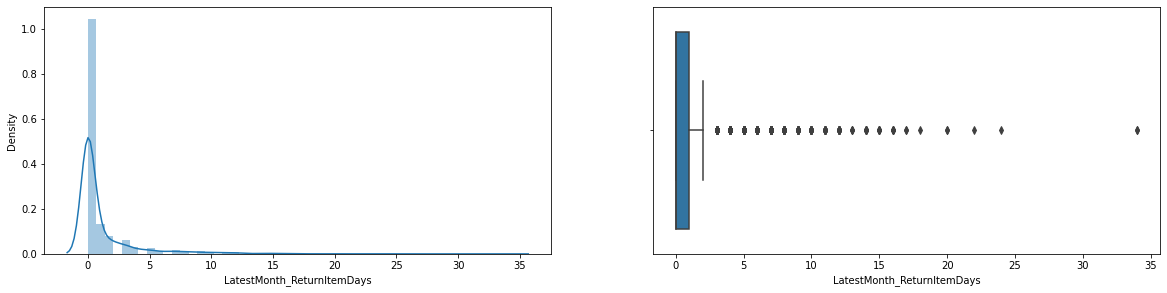

attribute_name : PctChangeInReveune
Description of attribute : 

count    3750.000000
mean       -0.035559
std         1.237027
min       -56.591706
25%        -0.087286
50%         0.071682
75%         0.231610
max         0.992493
Name: PctChangeInReveune, dtype: float64 

Value counts of attribute : 

 0.000000    51
 0.123046     1
 0.203145     1
 0.253816     1
-0.178556     1
             ..
 0.189181     1
 0.023915     1
 0.073660     1
-0.352307     1
-0.026594     1
Name: PctChangeInReveune, Length: 3700, dtype: int64 

Unique number of attribute : 

[ 0.12304646  0.05402425  0.41342637 ...  0.2729429   0.1933134
 -0.02659384] 

Missing values in attribute : 

168 

Missing values in attribute_% : 

4.287901990811639 



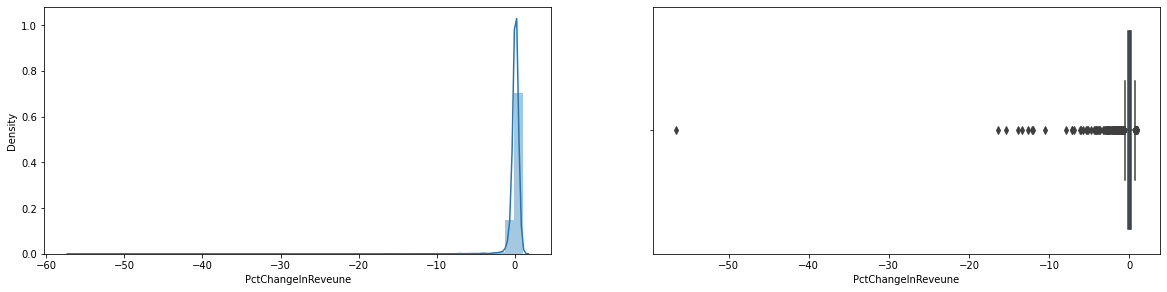

attribute_name : Renewal_PreviousAvgMonthRevenue
Description of attribute : 

count    3.776000e+03
mean     6.516761e+04
std      2.292438e+05
min      1.220200e+02
25%      1.509833e+04
50%      2.554838e+04
75%      5.198703e+04
max      9.840592e+06
Name: Renewal_PreviousAvgMonthRevenue, dtype: float64 

Value counts of attribute : 

403775.76    2
10451.05     2
34488.69     2
82656.49     2
40392.00     2
            ..
11375.73     1
606092.94    1
11447.21     1
47790.21     1
27284.00     1
Name: Renewal_PreviousAvgMonthRevenue, Length: 3715, dtype: int64 

Unique number of attribute : 

[33352.56 22002.45 19776.33 ... 73406.44 32503.92 27284.  ] 

Missing values in attribute : 

142 

Missing values in attribute_% : 

3.6242981112812664 



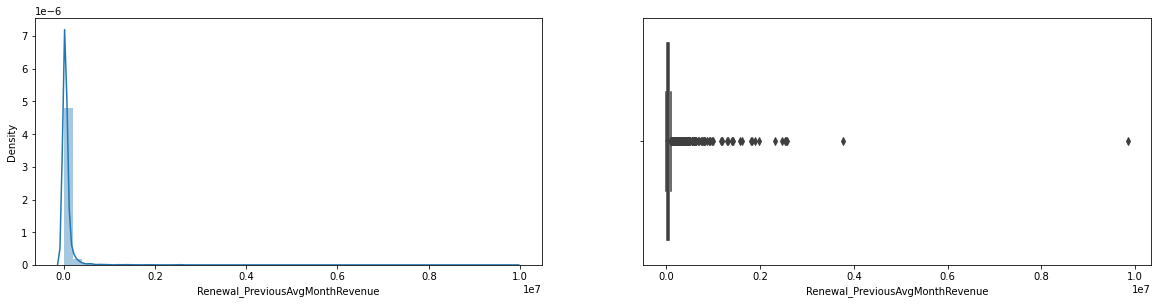

attribute_name : Renewal_PreviousAvgDailyBalance
Description of attribute : 

count    3.776000e+03
mean     1.082805e+04
std      4.852560e+04
min     -1.447103e+05
25%      1.721257e+03
50%      3.536385e+03
75%      7.846243e+03
max      2.450719e+06
Name: Renewal_PreviousAvgDailyBalance, dtype: float64 

Value counts of attribute : 

993.00       3
41218.48     2
5645.38      2
3929.72      2
3820.25      2
            ..
3150.34      1
193439.08    1
1230.35      1
6919.44      1
4914.16      1
Name: Renewal_PreviousAvgDailyBalance, Length: 3709, dtype: int64 

Unique number of attribute : 

[23557.68  6128.15  5128.67 ...  4654.21  2812.    4914.16] 

Missing values in attribute : 

142 

Missing values in attribute_% : 

3.6242981112812664 



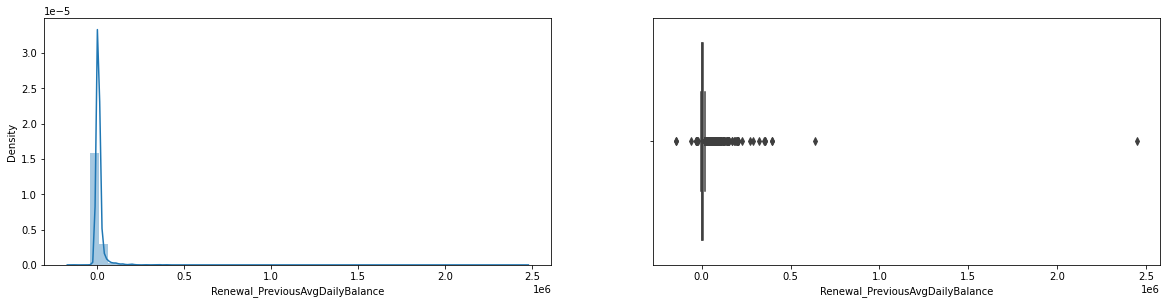

attribute_name : PctAvgDailybalance2AvgMonthlyDeposits
Description of attribute : 

count    3899.000000
mean        0.199944
std         0.364385
min        -0.255268
25%         0.062848
50%         0.118284
75%         0.215229
max        11.842794
Name: PctAvgDailybalance2AvgMonthlyDeposits, dtype: float64 

Value counts of attribute : 

0.124856    2
0.105416    2
2.049500    2
0.287465    2
0.015758    2
           ..
0.258324    1
0.177465    1
0.209563    1
0.057023    1
0.008093    1
Name: PctAvgDailybalance2AvgMonthlyDeposits, Length: 3887, dtype: int64 

Unique number of attribute : 

[0.17479879 0.13941571 0.07283761 ... 0.09787142 0.08513439 0.00809265] 

Missing values in attribute : 

19 

Missing values in attribute_% : 

0.48494129657988766 



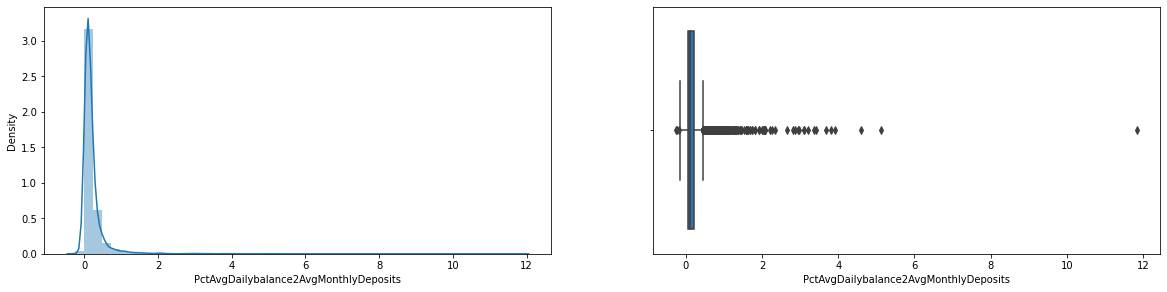

attribute_name : Avg_ReturnItemdays
Description of attribute : 

count    3899.000000
mean        0.802278
std         1.874270
min         0.000000
25%         0.000000
50%         0.000000
75%         0.666666
max        20.000000
Name: Avg_ReturnItemdays, dtype: float64 

Value counts of attribute : 

0.000000     2392
0.250000      202
0.333333      154
1.000000      125
0.666666      120
             ... 
8.250000        1
9.500000        1
15.666666       1
8.500000        1
13.000000       1
Name: Avg_ReturnItemdays, Length: 76, dtype: int64 

Unique number of attribute : 

[ 0.        2.        0.25      9.        4.25      0.666666  1.25
  0.5       3.5       3.        1.333333  2.333333  1.5       0.75
 10.5       1.75      2.25      5.666666  4.        1.        2.5
  9.666666  3.75      4.666666  7.        0.333333  2.666666 11.
  3.333333  8.75      1.666666  5.        6.5      15.        4.75
  9.5       5.333333  3.25      3.666666  4.333333  5.5       9.333333
  6.66666

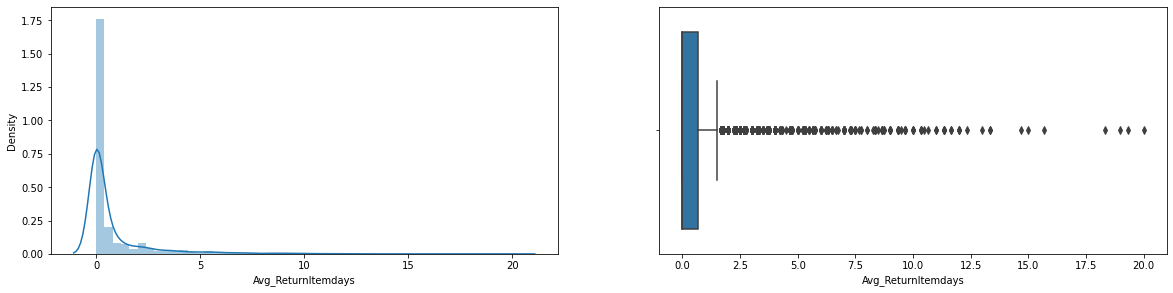

attribute_name : Last3Statments_MA_ReturnItemDays
Description of attribute : 

count    3899.000000
mean        0.790074
std         1.885862
min         0.000000
25%         0.000000
50%         0.000000
75%         0.666666
max        19.333333
Name: Last3Statments_MA_ReturnItemDays, dtype: float64 

Value counts of attribute : 

0.000000     2495
0.333333      334
0.666666      206
1.000000      156
1.333333       81
1.666666       66
2.000000       65
2.333333       63
2.666666       46
3.000000       43
3.666666       27
0.500000       24
3.333333       24
4.333333       23
4.666666       21
5.333333       21
4.000000       20
5.000000       17
7.000000       14
6.000000       13
5.666666       12
1.500000       11
6.333333       11
2.500000       10
6.666666        9
8.333333        8
7.333333        7
9.333333        6
8.666666        5
9.000000        5
10.333333       5
11.333333       4
6.500000        4
9.666666        4
10.000000       4
12.333333       3
3.500000        3


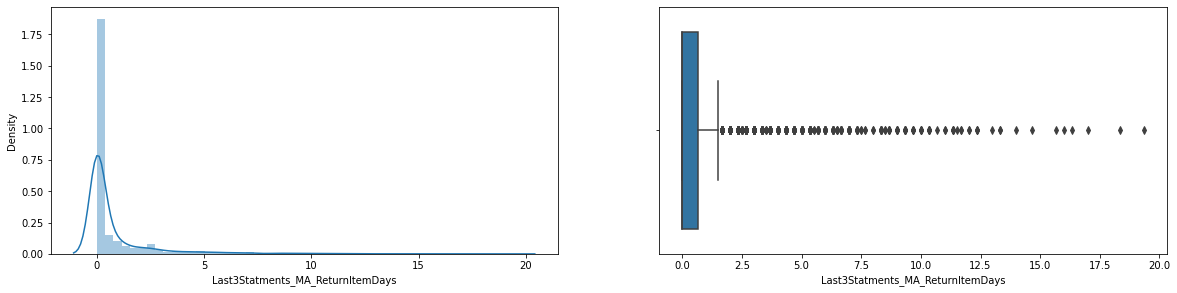

attribute_name : Last3Statments_MA_AvgDailyBalance
Description of attribute : 

count    3.899000e+03
mean     1.206905e+04
std      6.787869e+04
min     -1.365124e+05
25%      1.610998e+03
50%      3.484573e+03
75%      8.221643e+03
max      3.129067e+06
Name: Last3Statments_MA_AvgDailyBalance, dtype: float64 

Value counts of attribute : 

1398.103333     3
22998.100000    3
35701.160000    2
8984.666666     2
5966.636666     2
               ..
1665.333333     1
823.213333      1
21124.026666    1
17116.306666    1
215.080000      1
Name: Last3Statments_MA_AvgDailyBalance, Length: 3793, dtype: int64 

Unique number of attribute : 

[6648.003333 3242.666666 2455.723333 ... 9881.466666 3430.333333
  215.08    ] 

Missing values in attribute : 

19 

Missing values in attribute_% : 

0.48494129657988766 



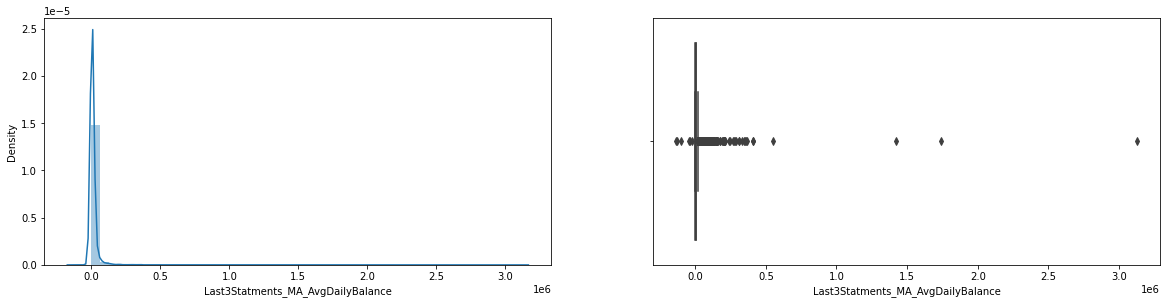

attribute_name : Last3Statments_MA_AdjustedMonthlyDeposits
Description of attribute : 

count    3.899000e+03
mean     7.725653e+04
std      3.117959e+05
min      1.220150e+02
25%      1.664543e+04
50%      2.922352e+04
75%      5.801218e+04
max      1.241704e+07
Name: Last3Statments_MA_AdjustedMonthlyDeposits, dtype: float64 

Value counts of attribute : 

9.338329e+04    3
2.861093e+06    2
3.678395e+04    2
2.979713e+04    2
5.996667e+03    2
               ..
3.059435e+04    1
7.946667e+03    1
1.443640e+04    1
2.150169e+05    1
2.657721e+04    1
Name: Last3Statments_MA_AdjustedMonthlyDeposits, Length: 3797, dtype: int64 

Unique number of attribute : 

[ 38032.296666  23259.        33715.       ... 100963.786666  40293.123333
  26577.21    ] 

Missing values in attribute : 

19 

Missing values in attribute_% : 

0.48494129657988766 



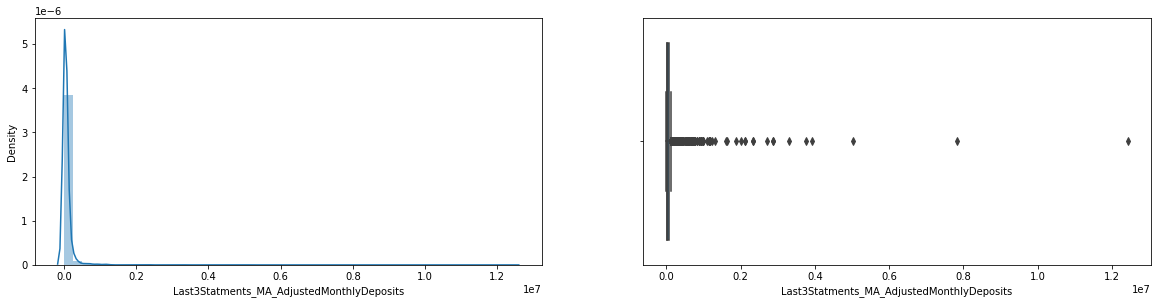

attribute_name : Renewal_PreviousPaidPercentageOfRTR
Description of attribute : 

count    3903.000000
mean        0.735514
std         0.255810
min         0.000000
25%         0.550000
50%         0.670000
75%         0.950000
max         2.150000
Name: Renewal_PreviousPaidPercentageOfRTR, dtype: float64 

Value counts of attribute : 

1.00    463
0.53    162
0.52    152
0.51    139
0.60    126
       ... 
1.72      1
1.64      1
0.19      1
1.86      1
1.91      1
Name: Renewal_PreviousPaidPercentageOfRTR, Length: 171, dtype: int64 

Unique number of attribute : 

[0.74 0.9  0.88 0.89 0.65 1.   0.46 0.67 0.8  0.22 1.18 0.57 0.59 0.78
 0.7  0.61 0.86 0.63 0.52 0.5  0.6  0.96 1.67 0.31 0.71 1.09 0.83 0.54
 0.35 0.53 0.64 0.51 0.79 1.01 0.26 0.34 0.56 0.55 0.91 0.87 0.72 1.03
 1.02 0.94 1.11 0.48 0.82 0.44 0.23 1.06 1.46 0.58 0.81 0.98 0.36 0.92
 1.17 0.75 1.37 0.73 0.49 0.69 0.42 1.41 1.42 0.68 0.66 0.95 0.2  1.14
 1.3  0.18 1.25 0.77 0.93 0.62 0.28 0.76 0.85 1.13 1.04  nan 1.1  0.37


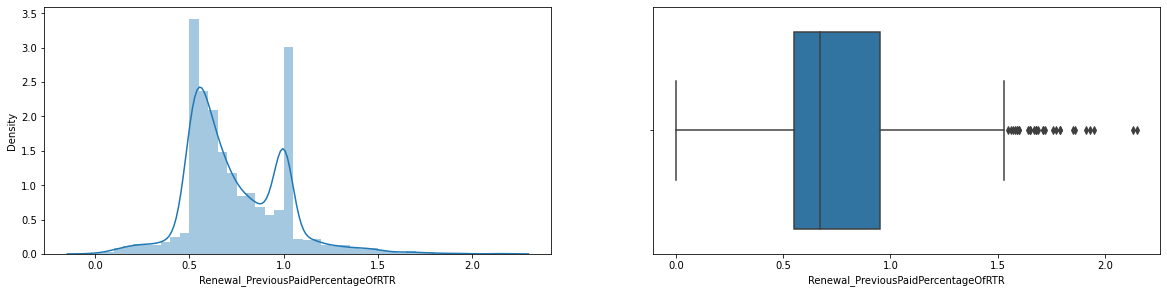

attribute_name : AdjustedMonthlyDeposits
Description of attribute : 

count    3.904000e+03
mean     7.587655e+04
std      3.346313e+05
min     -1.790000e+02
25%      1.541322e+04
50%      2.908738e+04
75%      5.797432e+04
max      1.585575e+07
Name: AdjustedMonthlyDeposits, dtype: float64 

Value counts of attribute : 

0.00         6
10027.00     3
232262.00    2
95563.01     2
89436.00     2
            ..
39913.06     1
8027.25      1
283641.61    1
16893.19     1
26577.21     1
Name: AdjustedMonthlyDeposits, Length: 3866, dtype: int64 

Unique number of attribute : 

[32815.22 31250.   34087.   ... 75019.18 35443.56 26577.21] 

Missing values in attribute : 

14 

Missing values in attribute_% : 

0.35732516590096985 



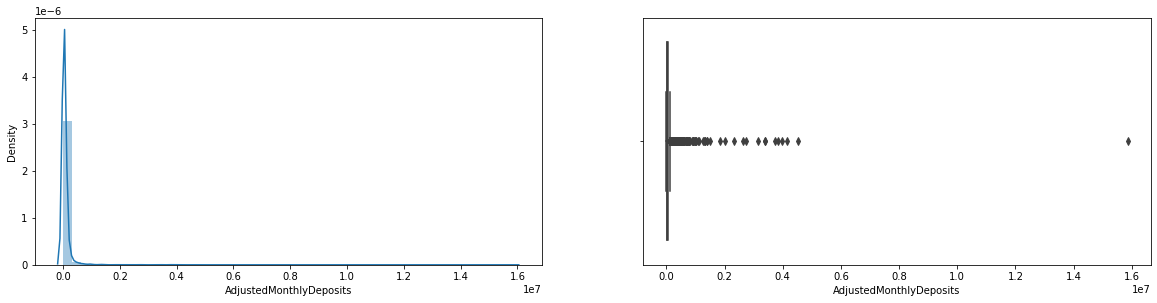

attribute_name : Credit_Score__c
Description of attribute : 

count    3887.000000
mean      551.186005
std       155.277215
min         0.000000
25%       534.000000
50%       580.000000
75%       625.000000
max       815.000000
Name: Credit_Score__c, dtype: float64 

Value counts of attribute : 

0.0      194
1.0       51
595.0     35
612.0     33
550.0     31
        ... 
421.0      1
754.0      1
426.0      1
772.0      1
783.0      1
Name: Credit_Score__c, Length: 328, dtype: int64 

Unique number of attribute : 

[706. 553. 573. 594. 613. 474. 630. 503. 642. 688. 561. 538. 579. 489.
 590. 651.   1. 509. 640. 563.   0. 555. 552. 536. 599. 612. 507. 477.
 516. 581. 512. 664. 662. 583. 574. 620. 632. 499. 582. 535. 678. 587.
 657. 492. 595. 645. 634. 513. 532. 597. 703. 562. 528. 533. 577. 540.
 558. 546. 752. 658. 585. 621.  nan 653. 580. 567. 524. 578. 554. 600.
 609. 508. 491. 631. 652. 736. 647. 522. 575. 526. 648. 542. 607. 556.
 633. 481. 566. 543. 586. 517. 602. 596. 638. 584

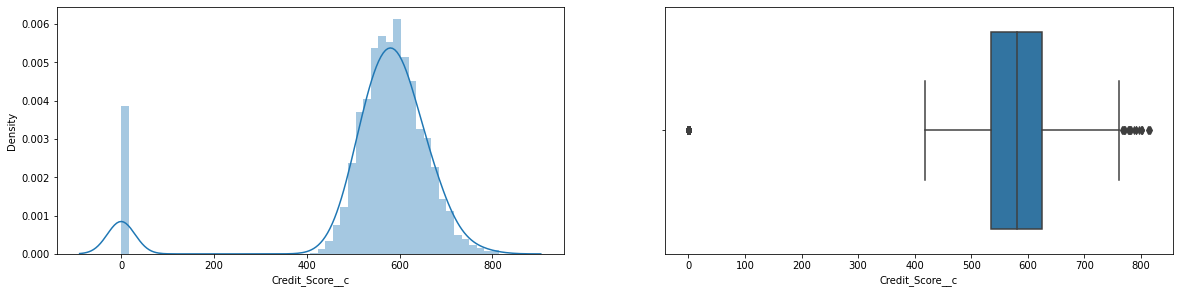

attribute_name : Renewal_PreviousPace
Description of attribute : 

count    3903.000000
mean       98.437120
std         6.323649
min        30.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: Renewal_PreviousPace, dtype: float64 

Value counts of attribute : 

100.00    3513
88.00        5
93.75        3
96.30        3
88.89        3
          ... 
76.18        1
97.70        1
85.55        1
67.40        1
66.62        1
Name: Renewal_PreviousPace, Length: 345, dtype: int64 

Unique number of attribute : 

[100.    82.87  45.65  97.56  77.85  58.66  77.93  97.48  87.59  93.75
  69.03  71.97  81.33  97.76  58.95  94.26  75.11  77.14  80.    94.52
  69.23  99.64  97.5   92.34  84.41  88.89  86.84  94.98  82.54  97.44
  61.4   99.56    nan  79.55  89.43  52.39  64.04  90.91  98.48  90.16
  95.55  87.5   98.33  88.    99.92  82.3   92.    91.67  78.96  98.08
  93.34  90.48  99.    98.65  97.66  67.13  92.15  93.72  94.29  82.
  98.17  98.21

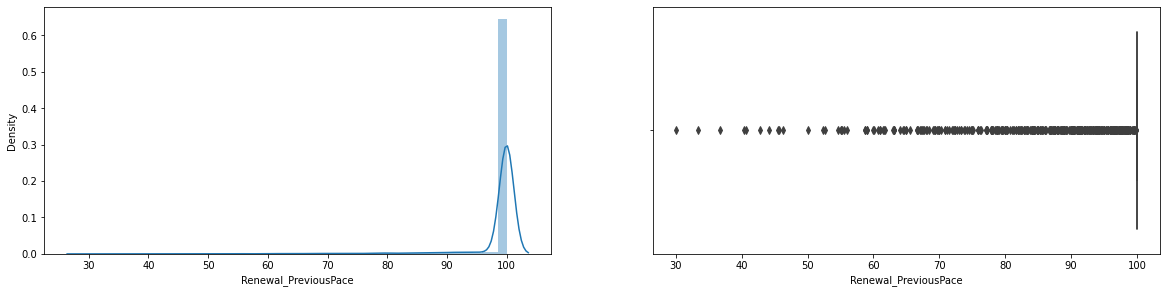

attribute_name : drop_percent
Description of attribute : 

count    3903.000000
mean        9.843911
std       100.023744
min      -384.435096
25%       -29.933216
50%        -5.456571
75%        27.290304
max      3000.881057
Name: drop_percent, dtype: float64 

Value counts of attribute : 

-24.476489     3
 51.101124     2
-60.823830     2
-13.614258     2
 115.040463    2
              ..
 33.909253     1
 12.579663     1
-30.353109     1
 53.896510     1
-17.028807     1
Name: drop_percent, Length: 3883, dtype: int64 

Unique number of attribute : 

[ -8.335428  62.223894 -22.878714 ...  20.597831 -34.156789 -17.028807] 

Missing values in attribute : 

15 

Missing values in attribute_% : 

0.38284839203675347 



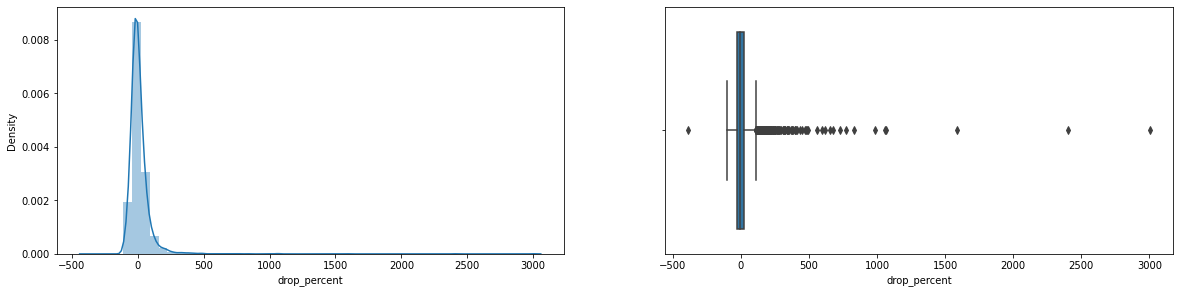

attribute_name : TwoMonthAvg_AdjustedMonthlyDeposits
Description of attribute : 

count    3.903000e+03
mean     7.509582e+04
std      2.177390e+05
min     -6.656000e+03
25%      1.727038e+04
50%      3.060688e+04
75%      6.007972e+04
max      5.447013e+06
Name: TwoMonthAvg_AdjustedMonthlyDeposits, dtype: float64 

Value counts of attribute : 

13276.658750    3
59189.500000    2
73565.525000    2
30797.785000    2
54626.753333    2
               ..
18454.573750    1
28068.532857    1
79342.742727    1
45767.206250    1
42717.905000    1
Name: TwoMonthAvg_AdjustedMonthlyDeposits, Length: 3882, dtype: int64 

Unique number of attribute : 

[ 35799.237777  19263.5       44199.206153 ... 273749.445    113936.09
  42717.905   ] 

Missing values in attribute : 

15 

Missing values in attribute_% : 

0.38284839203675347 



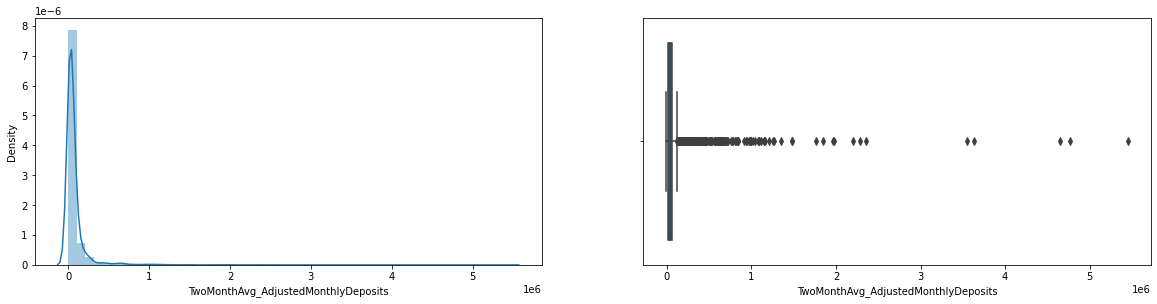

In [ ]:
missing_attributes = ['LatestMonth_ReturnItemDays', 
                      'PctChangeInReveune', 
                      'Renewal_PreviousAvgMonthRevenue',
                      'Renewal_PreviousAvgDailyBalance',
                      'PctAvgDailybalance2AvgMonthlyDeposits',
                      'Avg_ReturnItemdays',
                      "Last3Statments_MA_ReturnItemDays",
                      "Last3Statments_MA_AvgDailyBalance",
                      'Last3Statments_MA_AdjustedMonthlyDeposits',
                      'Renewal_PreviousPaidPercentageOfRTR', 
                      'AdjustedMonthlyDeposits',                                              
                      'Credit_Score__c',                          
                      'Renewal_PreviousPace',
                      'drop_percent',
                      'TwoMonthAvg_AdjustedMonthlyDeposits']    

for col in missing_attributes:
  print('\033[1m'+'attribute_name :', col+'\033[0m')
  attribute_info(data[col])

In [ ]:
missing_attributes = ['PctChangeInReveune', 
                      'Renewal_PreviousAvgMonthRevenue',
                      'Renewal_PreviousAvgDailyBalance',
                      'PctAvgDailybalance2AvgMonthlyDeposits',
                      'Avg_ReturnItemdays',
                      "Last3Statments_MA_ReturnItemDays",
                      "Last3Statments_MA_AvgDailyBalance",
                      'Last3Statments_MA_AdjustedMonthlyDeposits',
                      'Renewal_PreviousPaidPercentageOfRTR', 
                      'AdjustedMonthlyDeposits',                                              
                      'Credit_Score__c',                          
                      'Renewal_PreviousPace',
                      'drop_percent',
                      'TwoMonthAvg_AdjustedMonthlyDeposits']  

                      

In [ ]:
# print('LatestMonth_ReturnItemDays :                   ', data['LatestMonth_ReturnItemDays'].median())
print('PctChangeInReveune :                           ', data['PctChangeInReveune'].median())
print('Renewal_PreviousAvgMonthRevenue :              ', data['Renewal_PreviousAvgMonthRevenue'].median())
print('Renewal_PreviousAvgDailyBalance :              ', data['Renewal_PreviousAvgDailyBalance'].median())
print('PctAvgDailybalance2AvgMonthlyDeposits :        ', data['PctAvgDailybalance2AvgMonthlyDeposits'].median())
print('Avg_ReturnItemdays :                           ', data['Avg_ReturnItemdays'].median())
print('Last3Statments_MA_ReturnItemDays :             ', data['Last3Statments_MA_ReturnItemDays'].median())
print('Last3Statments_MA_AvgDailyBalance :            ', data['Last3Statments_MA_AvgDailyBalance'].median())
print('Last3Statments_MA_AdjustedMonthlyDeposits :    ', data['Last3Statments_MA_AdjustedMonthlyDeposits'].median())
print('Renewal_PreviousPaidPercentageOfRTR :          ', data['Renewal_PreviousPaidPercentageOfRTR'].median())
print('AdjustedMonthlyDeposits :                      ', data['AdjustedMonthlyDeposits'].median())
print('Renewal_PreviousPace :                         ', data['Renewal_PreviousPace'].median())
print('drop_percent :                                 ', data['drop_percent'].median())
print('TwoMonthAvg_AdjustedMonthlyDeposits :          ', data['TwoMonthAvg_AdjustedMonthlyDeposits'].median())

PctChangeInReveune :                            0.071682171567661
Renewal_PreviousAvgMonthRevenue :               25548.375
Renewal_PreviousAvgDailyBalance :               3536.385
PctAvgDailybalance2AvgMonthlyDeposits :         0.118283504985409
Avg_ReturnItemdays :                            0.0
Last3Statments_MA_ReturnItemDays :              0.0
Last3Statments_MA_AvgDailyBalance :             3484.573333
Last3Statments_MA_AdjustedMonthlyDeposits :     29223.52
Renewal_PreviousPaidPercentageOfRTR :           0.67
AdjustedMonthlyDeposits :                       29087.375
Renewal_PreviousPace :                          100.0
drop_percent :                                  -5.456571
TwoMonthAvg_AdjustedMonthlyDeposits :           30606.885


In [ ]:
credit_mean = data[(data['Credit_Score__c'] != 0) & (data['Credit_Score__c'] != 1)]['Credit_Score__c'].mean()
credit_mean

588.2506864360241

In [ ]:
data['Renewal_PreviousPaidPercentageOfRTR'].fillna(data['Renewal_PreviousPaidPercentageOfRTR'].median(), inplace = True)
# data['LatestMonth_ReturnItemDays'].fillna(data['LatestMonth_ReturnItemDays'].median(),inplace = True)
data['PctChangeInReveune'].fillna(data['PctChangeInReveune'].median(),inplace = True)
data['PctAvgDailybalance2AvgMonthlyDeposits'].fillna(data['PctAvgDailybalance2AvgMonthlyDeposits'].median(),inplace = True)
data['Avg_ReturnItemdays'].fillna(data['Avg_ReturnItemdays'].median(),inplace = True)
data['Renewal_PreviousAvgMonthRevenue'].fillna(data['Renewal_PreviousAvgMonthRevenue'].median(),inplace = True)
data['Renewal_PreviousAvgDailyBalance'].fillna(data['Renewal_PreviousAvgDailyBalance'].median(),inplace = True)
data['Renewal_PreviousPace'].fillna(data['Renewal_PreviousPace'].median(),inplace = True)
data['drop_percent'].fillna(data['drop_percent'].median(),inplace = True)
data['TwoMonthAvg_AdjustedMonthlyDeposits'].fillna(data['TwoMonthAvg_AdjustedMonthlyDeposits'].median(),inplace = True)
data['AdjustedMonthlyDeposits'].fillna(data['AdjustedMonthlyDeposits'].median(),inplace = True)

data['Last3Statments_MA_ReturnItemDays'].fillna(data['Last3Statments_MA_ReturnItemDays'].median(),inplace = True)
data['Last3Statments_MA_AvgDailyBalance'].fillna(data['Last3Statments_MA_AvgDailyBalance'].median(),inplace = True)
data['Last3Statments_MA_AdjustedMonthlyDeposits'].fillna(data['Last3Statments_MA_AdjustedMonthlyDeposits'].median(),inplace = True)



In [ ]:
credit_mean = data[(data['Credit_Score__c'] != 0) & (data['Credit_Score__c'] != 1)]['Credit_Score__c'].mean()
credit_mean

588.2506864360241

In [ ]:
data['Credit_Score__c'].fillna(credit_mean,inplace = True)

In [ ]:
# attribute_info(data['Credit_Score__c'])

In [ ]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

LatestMonth_ReturnItemDays                    26.569678
OpportunityID_ren                              0.000000
CreatedDate                                    0.000000
FundedWriteOffAmount_Gross                     0.000000
WOGross_AdvanceBalance                         0.000000
Avg_ReturnItemdays                             0.000000
PctChangeInReveune                             0.000000
PctAvgDailybalance2AvgMonthlyDeposits          0.000000
TwoMonthAvg_AdjustedMonthlyDeposits            0.000000
AdjustedMonthlyDeposits                        0.000000
drop_percent                                   0.000000
Is_this_Business_home_based__c_Yes             0.000000
Industry_Construction                          0.000000
Industry_E-Commerce                            0.000000
Industry_Finance, Insurance, Real Estate       0.000000
Industry_Manufacturing                         0.000000
Industry_Mining                                0.000000
Industry_Retail                                0

In [ ]:
data['LatestMonth_ReturnItemDays'][:10]

0      0.0
1      0.0
2      0.0
4      2.0
5      2.0
6      0.0
7      1.0
8     11.0
9      0.0
10     NaN
Name: LatestMonth_ReturnItemDays, dtype: float64

In [ ]:
null_return = data[data['LatestMonth_ReturnItemDays'].isna()].index
count = 0
for i in null_return:
    print(i)
    count += 1
print('\n')
print('Total null = ', count)


10
11
12
13
17
21
25
27
30
35
38
43
45
46
52
53
57
62
65
71
75
77
86
87
93
95
100
105
106
114
115
118
119
120
124
129
135
139
140
141
142
144
147
150
155
156
158
162
165
166
167
173
174
175
177
179
180
187
195
201
203
204
211
214
222
225
226
227
229
235
238
244
254
255
256
257
265
269
272
275
291
296
297
300
303
304
308
315
316
321
326
329
330
333
334
343
352
354
355
357
358
359
364
365
373
377
381
389
401
403
405
407
420
422
423
426
427
431
435
447
452
459
461
463
466
467
475
477
479
483
484
493
494
498
501
502
504
517
518
521
530
539
545
552
553
557
559
572
576
578
584
589
590
604
609
613
615
616
618
623
625
626
627
628
630
632
642
646
647
649
657
665
666
673
676
679
682
683
685
689
690
692
695
696
706
711
717
722
723
726
734
736
738
740
742
743
746
748
755
761
771
774
779
783
797
805
806
808
812
818
823
825
841
845
860
862
863
866
869
870
871
878
880
887
892
893
897
902
912
918
924
938
941
946
949
956
957
961
962
969
972
980
986
988
993
1001
1003
1004
1005
1008
1020
1023
1025
1028
1

In [ ]:
data['LatestMonth_ReturnItemDays'] = data['LatestMonth_ReturnItemDays'].fillna(-99999)

In [ ]:
data['LatestMonth_ReturnItemDays']

0           0.0
1           0.0
2           0.0
4           2.0
5           2.0
         ...   
3963   -99999.0
3964   -99999.0
3965   -99999.0
3966   -99999.0
3967        0.0
Name: LatestMonth_ReturnItemDays, Length: 3918, dtype: float64

In [ ]:
data['LatestMonth_ReturnItemDays_value'] = data["LatestMonth_ReturnItemDays"].apply(lambda x:0 if x < 0 else x)
data['LatestMonth_ReturnItemDays_flag'] = data["LatestMonth_ReturnItemDays"].apply(lambda x:1 if x < 0 else 0)

In [ ]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

OpportunityID_ren                             0.0
Industry_E-Commerce                           0.0
WOGross_AdvanceBalance                        0.0
Avg_ReturnItemdays                            0.0
LatestMonth_ReturnItemDays                    0.0
PctChangeInReveune                            0.0
PctAvgDailybalance2AvgMonthlyDeposits         0.0
TwoMonthAvg_AdjustedMonthlyDeposits           0.0
AdjustedMonthlyDeposits                       0.0
drop_percent                                  0.0
Is_this_Business_home_based__c_Yes            0.0
Industry_Construction                         0.0
Industry_Finance, Insurance, Real Estate      0.0
CreatedDate                                   0.0
Industry_Manufacturing                        0.0
Industry_Mining                               0.0
Industry_Retail                               0.0
Industry_Services                             0.0
Industry_Transportation & Public Utilities    0.0
Industry_Wholesale                            0.0


In [ ]:
data.head(3)

,OpportunityID_ren,CreatedDate,FundedDate,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,...,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade,Drop_category_Neutral/Null,Drop_category_Positive,LatestMonth_ReturnItemDays_value,LatestMonth_ReturnItemDays_flag
0,0062M00000o8ivqQAA,2022-01-10 17:42:32,2022-01-11,100.00,0.74,6.0,0.0,2.0,0.00,33352.56,...,0,0,1,0,0,0,0,0,0.0,0
1,0062M00000hmHKAQA2,2019-09-23 13:50:27,2019-09-30,100.00,0.90,1.0,0.0,2.0,0.00,22002.45,...,0,0,0,0,0,0,0,1,0.0,0
2,0062M00000kxeWLQAY,2020-07-20 17:12:35,2020-07-27,82.87,0.88,1.0,4.0,2.0,33.46,19776.33,...,0,0,0,1,0,0,0,0,0.0,0


In [ ]:
data.shape

(3918, 50)

In [ ]:
data.to_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/renewal/ren_after_eda.xlsx', index = False)